<>:174: SyntaxWarning: invalid escape sequence '\s'
<>:174: SyntaxWarning: invalid escape sequence '\s'
C:\Users\USER\AppData\Local\Temp\ipykernel_11392\2846850955.py:174: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title(f'Gaussian Kernel 3D Visualization ($\sigma={sigma}$)')


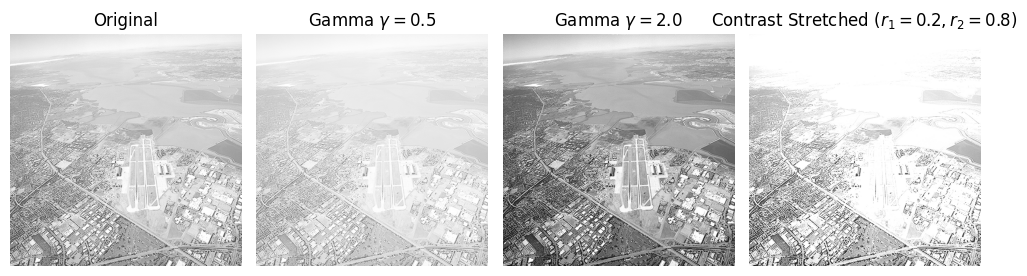

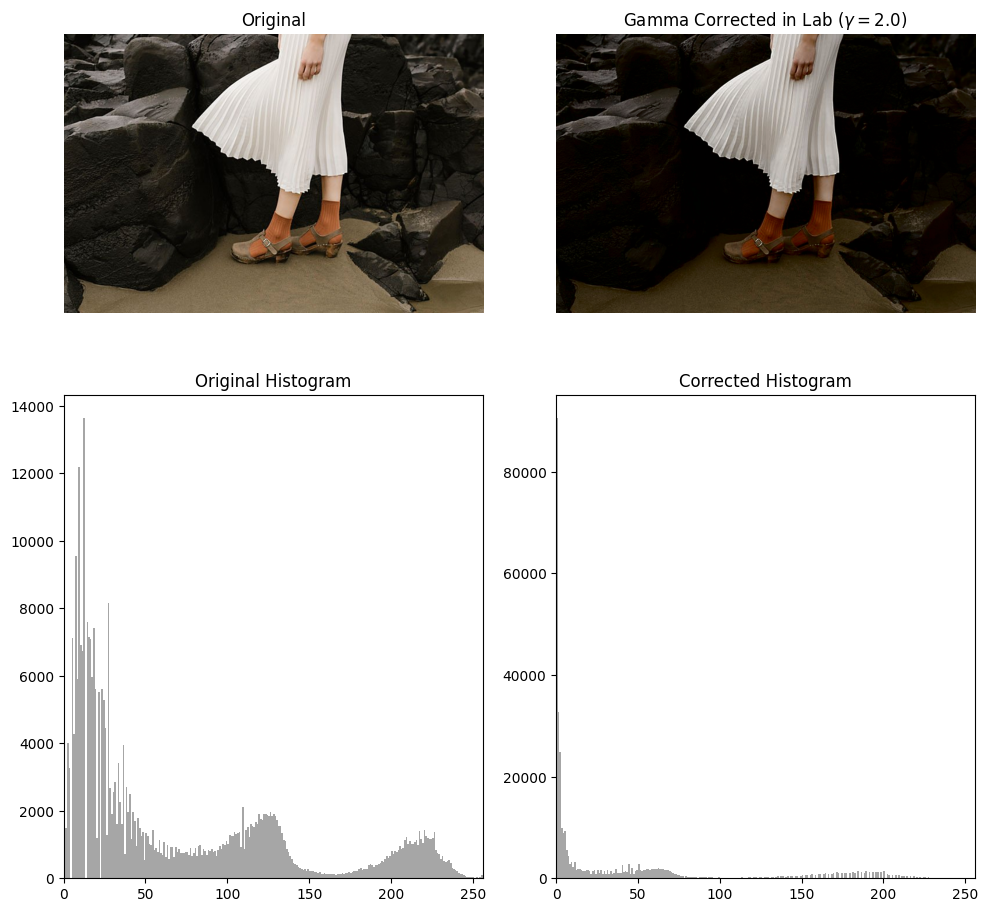

Otsu's threshold value: 101.0


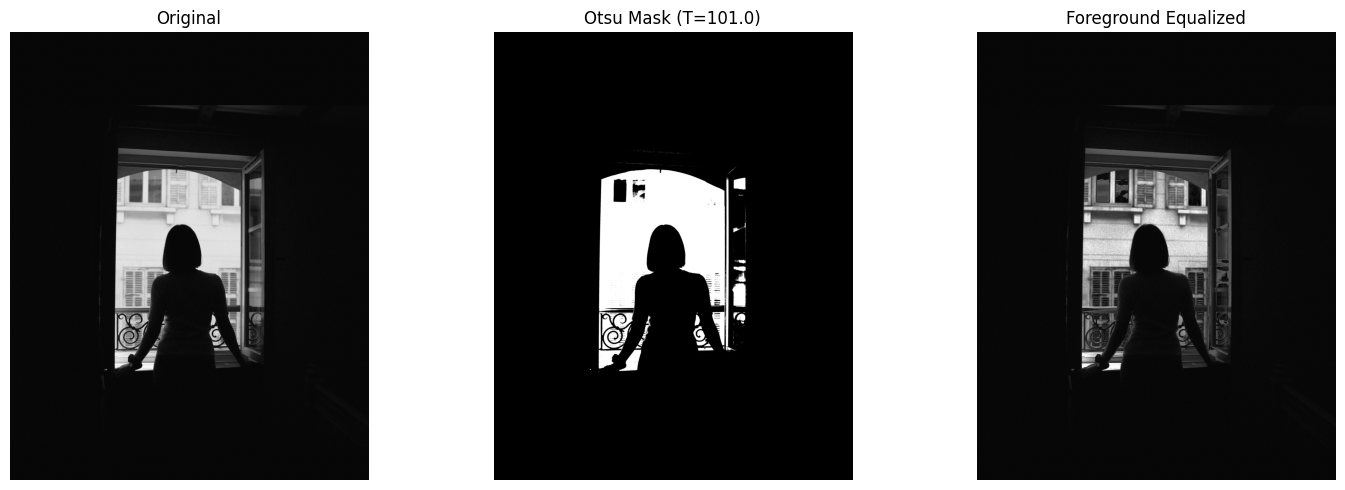

Computed 5x5 Gaussian Kernel:
 [[0.003 0.013 0.022 0.013 0.003]
 [0.013 0.06  0.098 0.06  0.013]
 [0.022 0.098 0.162 0.098 0.022]
 [0.013 0.06  0.098 0.06  0.013]
 [0.003 0.013 0.022 0.013 0.003]]


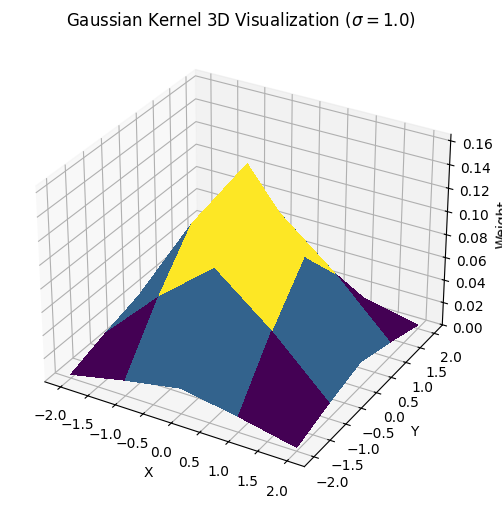

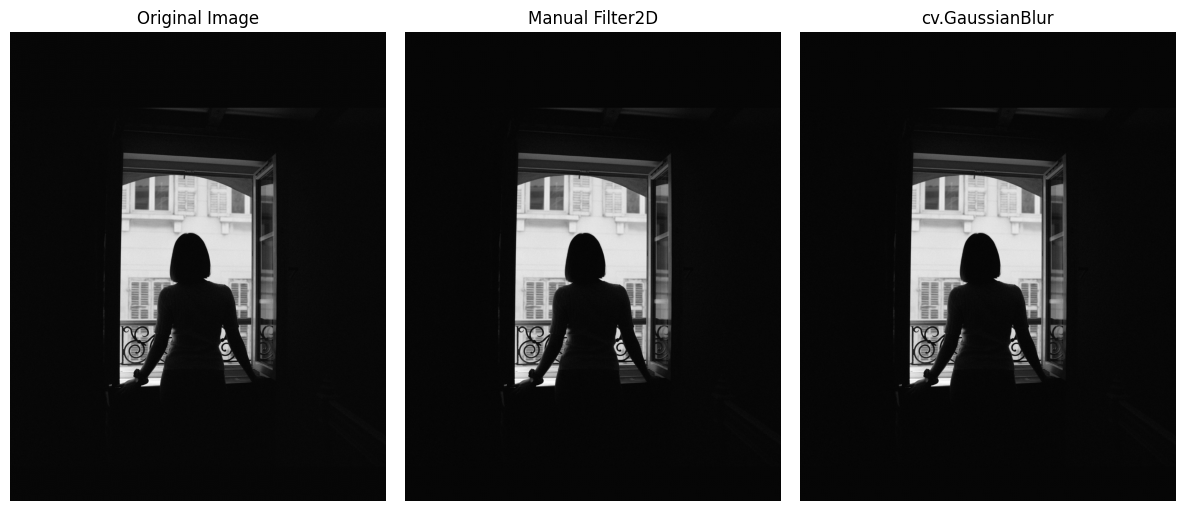

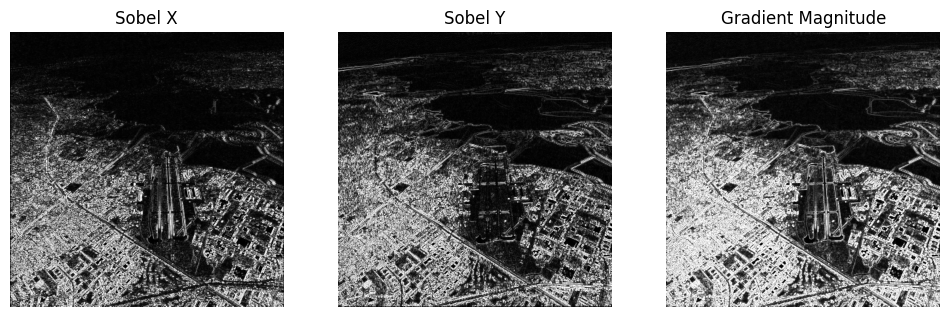

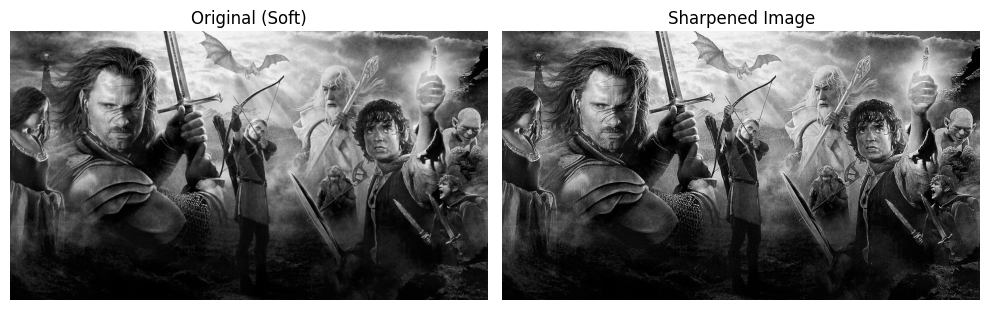

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### QUESTION 1 ###

f1 = cv.imread('Images/runway.png', cv.IMREAD_GRAYSCALE)

assert f1 is not None

plt.figure(figsize=(10, 10))

plt.subplot(1, 4, 1)
plt.imshow(f1, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

gamma_values = [0.5, 2.0]

for i, g in enumerate(gamma_values):
    table = np.array([((i / 255.0) ** g) * 255 for i in np.arange(0, 256)]).astype("uint8")

    h = cv.LUT(f1, table)
    cv.imwrite(f'q1_gamma_{g}.png', h)
    
    plt.subplot(1, 4, i+2)
    plt.imshow(h, cmap='gray', vmin=0, vmax=255)
    plt.title(rf"Gamma $\gamma={g}$")
    plt.axis('off')


r1 = int(0.2 * 255)
r2 = int(0.8 * 255)

stretch_table = []

for i in range(256):
    if i < r1:
        val = 0
    elif i > r2:
        val = 255
    else:
        val = ((i - r1) / (r2 - r1)) * 255
    stretch_table.append(val)

stretch_table = np.array(stretch_table).astype('uint8')
contrast_img = cv.LUT(f, stretch_table)

cv.imwrite('q1_contrast_stretch.png', contrast_img)

plt.subplot(1, 4, 4)
plt.imshow(contrast_img, cmap='gray', vmin=0, vmax=255)
plt.title(rf"Contrast Stretched ($r_1=0.2, r_2=0.8$)")
plt.axis('off')

plt.tight_layout()
plt.show()


### QUESTION 2 ###

f2 = cv.imread('Images/highlights_and_shadows.jpg')
assert f2 is not None

f2_lab = cv.cvtColor(f2, cv.COLOR_BGR2Lab)
L, a, b = cv.split(f2_lab)

gamma_lab = 2.0

L_norm = L/255
L_corrected = (np.power(L_norm, gamma_lab) * 255).astype('uint8')

f2_lab_corrected = cv.cvtColor(cv.merge((L_corrected, a, b)), cv.COLOR_Lab2BGR)
cv.imwrite('q2_lab_corrected.png', f2_lab_corrected)

plt.figure(figsize=(10, 10))

#Original
plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(f2, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('off')

#Corrected
plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(f2_lab_corrected, cv.COLOR_BGR2RGB))
plt.title(rf"Gamma Corrected in Lab ($\gamma={gamma_lab}$)")
plt.axis('off')

#Original Histogram
plt.subplot(2, 2, 3)
plt.hist(L.ravel(), bins=256, range=[0, 256], color = 'gray', alpha = 0.7)
plt.title("Original Histogram")
plt.xlim([0, 256])

#Corrected Histogram
plt.subplot(2, 2, 4)
plt.hist(L_corrected.ravel(), bins=256, range=[0, 256], color = 'gray', alpha = 0.7)
plt.title("Corrected Histogram")
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

### QUESTION 3 ###

#######################################I did not understand it properly
#Skipped for now, will return later if time permits

## QUESTION 4 ###

f4 = cv.imread('Images/looking_out.jpg', cv.IMREAD_GRAYSCALE)
assert f4 is not None

threshold_value, mask = cv.threshold(f4, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(f"Otsu's threshold value: {threshold_value}")

foreground_pixels = f4[mask == 255]
eq_pixels = cv.equalizeHist(foreground_pixels.reshape(-1, 1))

f4_equalized = f4.copy()
f4_equalized[mask == 255] = eq_pixels.flatten()

cv.imwrite('q4_masked_equalized.png', f4_equalized)

plt.figure(figsize=(15, 5))

#Original
plt.subplot(1, 3, 1)
plt.imshow(f4, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

#Mask
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
plt.title(f"Otsu Mask (T={threshold_value})")
plt.axis('off')

#Foreground Equalized
plt.subplot(1, 3, 3)
plt.imshow(f4_equalized, cmap='gray', vmin=0, vmax=255)
plt.title("Foreground Equalized")
plt.axis('off')

plt.tight_layout()
plt.show()

### QUESTION 5 ###

sigma = 1.0
kernel_size = 5
offset = kernel_size // 2

x_range = np.arange(-offset, offset + 1)
y_range = np.arange(-offset, offset + 1)
x, y = np.meshgrid(x_range, y_range)

constant = 1/(2 * np.pi * sigma ** 2)
exponent = -(x**2 + y**2) / (2 * sigma ** 2)
kernel = constant * np.exp(exponent)

kernel_normalized = kernel / kernel.sum()

print("Computed 5x5 Gaussian Kernel:\n", np.round(kernel_normalized, 3))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, kernel_normalized, cmap='viridis', linewidth=0, antialiased=False)
ax.set_title(f'Gaussian Kernel 3D Visualization ($\sigma={sigma}$)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Weight')
plt.show()

f4 = cv.imread('Images/looking_out.jpg', cv.IMREAD_GRAYSCALE)
assert f4 is not None

manual_blur = cv.filter2D(f4, -1, kernel_normalized)

cv.imwrite('q5_manual_gaussian.png', manual_blur)
    
opencv_blur = cv.GaussianBlur(f4, (5, 5), sigmaX=sigma)

plt.figure(figsize=(12, 5))
    
plt.subplot(1, 3, 1)
plt.imshow(f4, cmap='gray')
plt.title("Original Image")
plt.axis('off')
    
plt.subplot(1, 3, 2)
plt.imshow(manual_blur, cmap='gray')
plt.title("Manual Filter2D")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opencv_blur, cmap='gray')
plt.title("cv.GaussianBlur")
plt.axis('off')
    
plt.tight_layout()
plt.show()

### QUESTION 6 ###

gx = cv.Sobel(f1, cv.CV_64F, 1, 0, ksize = 3)
gy = cv.Sobel(f1, cv.CV_64F, 0, 1, ksize = 3)

magnitude = cv.magnitude(gx, gy)

gx_abs = cv.convertScaleAbs(gx)
gy_abs = cv.convertScaleAbs(gy)
magnitude_abs = cv.convertScaleAbs(magnitude)

cv.imwrite('q6_sobel_magnitude.png', gx_abs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(gx_abs, cmap='gray'); plt.title("Sobel X"); plt.axis('off')
plt.subplot(1, 3, 2); plt.imshow(gy_abs, cmap='gray'); plt.title("Sobel Y"); plt.axis('off')
plt.subplot(1, 3, 3); plt.imshow(magnitude_abs, cmap='gray'); plt.title("Gradient Magnitude"); plt.axis('off')
plt.show()

### QUESTION 7 ###

### QUESTION 8 ###

##########Skipped for now

### QUESTION 9 ###

f9 = cv.imread('Images/a1q5images/im01.png', cv.IMREAD_GRAYSCALE)
assert f9 is not None

sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

sharpened_img = cv.filter2D(f9, -1, sharpen_kernel)

cv.imwrite('q9_sharpened.png', sharpened_img)

plt.figure(figsize=(10, 5))

#Original
plt.subplot(1, 2, 1)
plt.imshow(f9, cmap='gray')
plt.title("Original (Soft)")
plt.axis('off')

#Sharpened
plt.subplot(1, 2, 2)
plt.imshow(sharpened_img, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

plt.tight_layout()
plt.show()






